In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [4]:
data = pandas.read_csv('./data/Boston.csv')
data.info()

array = np.array(data)
print(type(array))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
<class 'numpy.ndarray'>


In [5]:
# Normalising the feature - reffer this: https://developers.google.com/machine-learning/crash-course/numerical-data/normalization
def normalize_feature(X):
  n = X.shape[1]
  X_Norm = X
  mu = np.zeros(n)
  sigma = np.zeros(n)

  mu = np.mean(X, axis = 0) # column-wise mean
  sigma = np.std(X, axis = 0, ddof = 1)
  X_Norm = (X - mu) / sigma
  return X_Norm, mu, sigma

In [12]:
input = array[:, 1:14]
output = array[:, 14:15]

input, mu, sigma = normalize_feature(input)
input = np.c_[np.ones(output.shape[0]), input]
output = output.reshape(output.shape[0])

print(f'Input: {input}')
print(input.shape)

print(f'Output: {output}')
print(output.shape)


Input: [[ 1.         -0.41936693  0.28454827 ... -1.45755797  0.44061589
  -1.07449897]
 [ 1.         -0.41692667 -0.48724019 ... -0.3027945   0.44061589
  -0.49195252]
 [ 1.         -0.416929   -0.48724019 ... -0.3027945   0.39603507
  -1.20753241]
 ...
 [ 1.         -0.41303783 -0.48724019 ...  1.17530274  0.44061589
  -0.98207574]
 [ 1.         -0.40736095 -0.48724019 ...  1.17530274  0.40282626
  -0.86444617]
 [ 1.         -0.41458988 -0.48724019 ...  1.17530274  0.44061589
  -0.66839688]]
(506, 14)
Output: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 2

In [15]:
# theta = np.zeros(input.shape[1])
theta = random.randn(input.shape[1])
print(theta)

[-1.6252964  -0.25067865  0.27808791 -0.47413342 -1.23267551  1.52631963
 -0.47410739 -1.47819156  0.30814233 -0.43640963  1.09885091  1.21545381
 -0.3329951  -0.49385205]


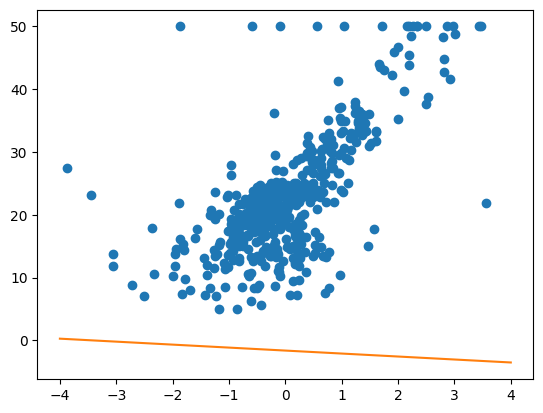

In [16]:
plt.plot(input[:, 6:7], output, 'o')
x = np.linspace(-4, 4)
plt.plot(x, (x * theta[6] + theta[0]), linestyle = 'solid')
plt.show()

In [17]:
def loss_function(input, output, theta):
  temp = np.dot(input, theta) - output
  loss = np.dot(np.transpose(temp), temp) / (2 * output.shape[0])
  return loss

print(loss_function(input, output, theta))

344.5879795053225


In [18]:
epoch = 1000
alpha = 0.0001

def gradient_descent(input, output, theta):
  for i in range(epoch):
    print(f'Epoch: {i}, Loss: {loss_function(input, output, theta)}')

    error = np.dot(input, theta).flatten() - output
    theta -= alpha * np.dot(np.transpose(input), error)
  
  return theta

gradient_descent(input, output, theta)

Epoch: 0, Loss: 344.5879795053225
Epoch: 1, Loss: 303.75458676779715
Epoch: 2, Loss: 270.98283180794573
Epoch: 3, Loss: 243.39667019266452
Epoch: 4, Loss: 219.48803815455577
Epoch: 5, Loss: 198.4153122377752
Epoch: 6, Loss: 179.66727066967772
Epoch: 7, Loss: 162.9015242841864
Epoch: 8, Loss: 147.8662932475949
Epoch: 9, Loss: 134.36205602167192
Epoch: 10, Loss: 122.22232396262311
Epoch: 11, Loss: 111.30363534653657
Epoch: 12, Loss: 101.48003389543337
Epoch: 13, Loss: 92.63976430566359
Epoch: 14, Loss: 84.68309505763428
Epoch: 15, Loss: 77.52074139044872
Epoch: 16, Loss: 71.07263044186132
Epoch: 17, Loss: 65.26687961232494
Epoch: 18, Loss: 60.03892139535336
Epoch: 19, Loss: 55.330738136460596
Epoch: 20, Loss: 51.09018509737645
Epoch: 21, Loss: 47.27038776241582
Epoch: 22, Loss: 43.82920332805803
Epoch: 23, Loss: 40.72873858184501
Epoch: 24, Loss: 37.93491777392619
Epoch: 25, Loss: 35.417095033743585
Epoch: 26, Loss: 33.147706589432694
Epoch: 27, Loss: 31.101958609122796
Epoch: 28, Loss: 

array([ 2.25328063e+01, -9.20463910e-01,  1.06756025e+00,  9.44085584e-02,
        6.89069893e-01, -2.04996405e+00,  2.68545891e+00,  1.21715869e-02,
       -3.11013055e+00,  2.54731151e+00, -1.94549460e+00, -2.05813286e+00,
        8.49317786e-01, -3.74276318e+00])

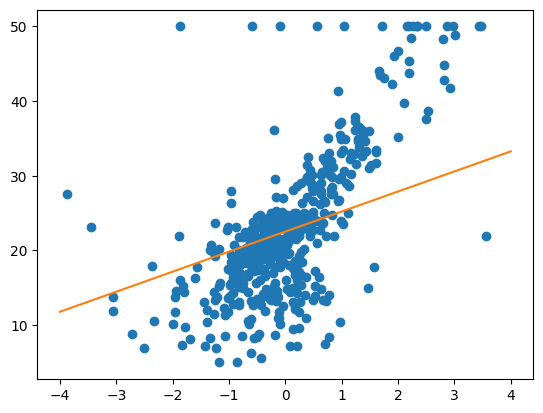

In [19]:
plt.plot(input[:, 6:7], output, 'o')
x = np.linspace(-4, 4)
plt.plot(x, (x * theta[6] + theta[0]), linestyle = 'solid')
plt.show()

In [20]:
def predict_price(input_data, mu, sigma, theta):
  predict = (input_data - mu) / sigma
  predict = np.r_[(1, predict)]

  price = np.dot(predict, theta)
  return price

input_data = np.array([0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14])
print(predict_price(input_data, mu, sigma, theta))

25.012383827977402
